Import package

In [1]:
import package_.preprocessing as preprocessing
import package_.featureSelection as featureSelection
import package_.classifier as classifier
import package_.ensemble as ensemble
import package_.performanceMetrics as performanceMetrics
import package_.combinedMetrics as combinedMetrics

Preprocessing

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
pr = preprocessing.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [4]:
X, y = pr.set_target('class')

In [5]:
pr.standardization()

Feature Selection

Lasso

In [6]:
lasso_features = featureSelection.FeatureSelection(X, y, 'lasso', 100)

In [7]:
lasso_features.show_features()

0       SFTPC
1      SLC6A4
2      CLDN18
3        AGER
4       ITLN2
5        LGI3
6    C13orf36
7      FAM83A
8       FABP4
9        HBA1
Name: Lasso, dtype: object


In [8]:
lasso_features = lasso_features.get_features()

ReliefF

In [9]:
relieff_features = featureSelection.FeatureSelection(X, y, 'relieff', 100)

In [10]:
relieff_features.show_features()

0         CELA2B
1          OR6K3
2    CCL14-CCL15
3         MAGEA2
4           PDX1
5          CHRM2
6         TFAP2D
7         SPHKAP
8            OTC
9         HOTAIR
Name: ReliefF, dtype: object


In [11]:
relieff_features = relieff_features.get_features()

Mrmr

In [12]:
mrmr_features = featureSelection.FeatureSelection(X, y, 'mrmr', 100)

100%|██████████| 100/100 [00:25<00:00,  3.94it/s]


In [13]:
mrmr_features.show_features()

0     PAICS
1    ANGPT4
2     GOLM1
3    SH3GL3
4     HTR3C
5     OR6K3
6      MYOC
7    CELA2B
8       MDK
9     OVCH1
Name: Mrmr, dtype: object


In [14]:
mrmr_features = mrmr_features.get_features()

uTest

In [15]:
uTest_features = featureSelection.FeatureSelection(X, y, 'uTest', 100)

In [16]:
uTest_features.show_features()

0     LRRTM4
1     TRIM46
2    PABPC1L
3      CD79A
4      GIPC2
5       NTN4
6       XKRX
7      SVEP1
8    GPR109B
9     DPYSL2
Name: Mann-Whitney U-test, dtype: object


In [17]:
uTest_features = uTest_features.get_features()

Classifier

Lasso

In [18]:
clf_lasso = classifier.Classifier(X, y, features=lasso_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [19]:
pm_lasso = performanceMetrics.PerformanceMetrics(clf_lasso)
pm_lasso.all_metrics()

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Roc Auc:
 {'adaboost': [0.981, 0.005], 'gradient boosting': [0.922, 0.021], 'random forest': [0.962, 0.012], 'k nearest neighbors': [0.986, 0.009], 'decision tree': [0.929, 0.019], 'extra trees': [0.98, 0.007], 'svm': [0.986, 0.009], 'xgb': [0.955, 0.012]}
F1 score:
 {'adaboost': [0.997, 0.005], 'gradient boosting': [0.988, 0.021], 'random forest': [0.993, 0.012], 'k nearest neighbors': [0.995, 0.009], 'decision tree': [0.989, 0.019], 'extra trees': [0.996, 0.007], 'svm': [0.995, 0.009], 'xgb': [0.993, 0.012]}
MCC:
 {'adaboost': [0.971, 0.005], 'gradient boosting': [0.881, 0.021], 'random forest': [0.934, 0.012], 'k nearest neighbors': [0.959, 0.009], 'decision tree': [0.894, 0.019], 'extra trees': [0.962, 0.007], 'svm': [0.957, 0.

["ACC: {'adaboost': 0.995, 'gradient boosting': 0.979, 'random forest': 0.988, 'k nearest neighbors': 0.991, 'decision tree': 0.981, 'extra trees': 0.993, 'svm': 0.991, 'xgb': 0.988}",
 "Roc Auc: {'adaboost': 0.981, 'gradient boosting': 0.922, 'random forest': 0.962, 'k nearest neighbors': 0.986, 'decision tree': 0.929, 'extra trees': 0.98, 'svm': 0.986, 'xgb': 0.955}",
 "F1 score: {'adaboost': 0.997, 'gradient boosting': 0.988, 'random forest': 0.993, 'k nearest neighbors': 0.995, 'decision tree': 0.989, 'extra trees': 0.996, 'svm': 0.995, 'xgb': 0.993}",
 "MCC: {'adaboost': 0.971, 'gradient boosting': 0.881, 'random forest': 0.934, 'k nearest neighbors': 0.959, 'decision tree': 0.894, 'extra trees': 0.962, 'svm': 0.957, 'xgb': 0.933}"]

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}


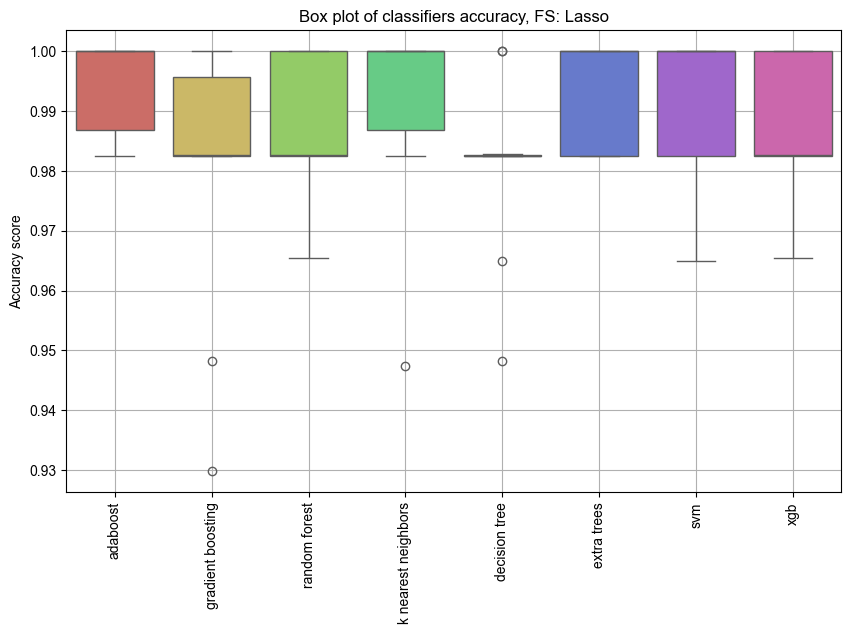

In [20]:
pm_lasso.plot_classifier_acc()

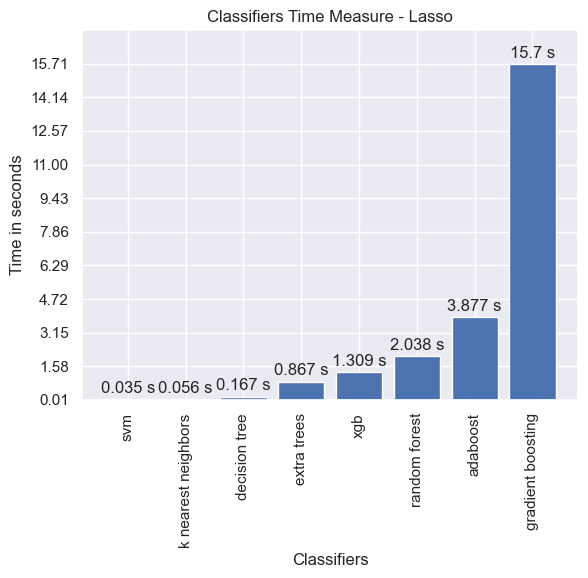

svm: 0.035 s.
k nearest neighbors: 0.056 s.
decision tree: 0.167 s.
extra trees: 0.867 s.
xgb: 1.309 s.
random forest: 2.038 s.
adaboost: 3.877 s.
gradient boosting: 15.7 s.


In [21]:
pm_lasso.plot_classifier_time()

Relieff

In [22]:
clf_relieff = classifier.Classifier(X, y, features=relieff_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [23]:
pm_relieff = performanceMetrics.PerformanceMetrics(clf_relieff)
pm_relieff.all_metrics()

Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Roc Auc:
 {'adaboost': [0.977, 0.012], 'gradient boosting': [0.909, 0.025], 'random forest': [0.969, 0.012], 'k nearest neighbors': [0.983, 0.014], 'decision tree': [0.906, 0.044], 'extra trees': [0.977, 0.012], 'svm': [0.989, 0.007], 'xgb': [0.959, 0.017]}
F1 score:
 {'adaboost': [0.993, 0.012], 'gradient boosting': [0.986, 0.025], 'random forest': [0.993, 0.012], 'k nearest neighbors': [0.992, 0.014], 'decision tree': [0.975, 0.044], 'extra trees': [0.993, 0.012], 'svm': [0.996, 0.007], 'xgb': [0.99, 0.017]}
MCC:
 {'adaboost': [0.939, 0.012], 'gradient boosting': [0.858, 0.025], 'random forest': [0.935, 0.012], 'k nearest neighbors': [0.93, 0.014], 'decision tree': [0.781, 0.044], 'extra trees': [0.939, 0.012], 'svm': [0.964, 0.0

["ACC: {'adaboost': 0.988, 'gradient boosting': 0.975, 'random forest': 0.988, 'k nearest neighbors': 0.986, 'decision tree': 0.956, 'extra trees': 0.988, 'svm': 0.993, 'xgb': 0.983}",
 "Roc Auc: {'adaboost': 0.977, 'gradient boosting': 0.909, 'random forest': 0.969, 'k nearest neighbors': 0.983, 'decision tree': 0.906, 'extra trees': 0.977, 'svm': 0.989, 'xgb': 0.959}",
 "F1 score: {'adaboost': 0.993, 'gradient boosting': 0.986, 'random forest': 0.993, 'k nearest neighbors': 0.992, 'decision tree': 0.975, 'extra trees': 0.993, 'svm': 0.996, 'xgb': 0.99}",
 "MCC: {'adaboost': 0.939, 'gradient boosting': 0.858, 'random forest': 0.935, 'k nearest neighbors': 0.93, 'decision tree': 0.781, 'extra trees': 0.939, 'svm': 0.964, 'xgb': 0.915}"]

Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}


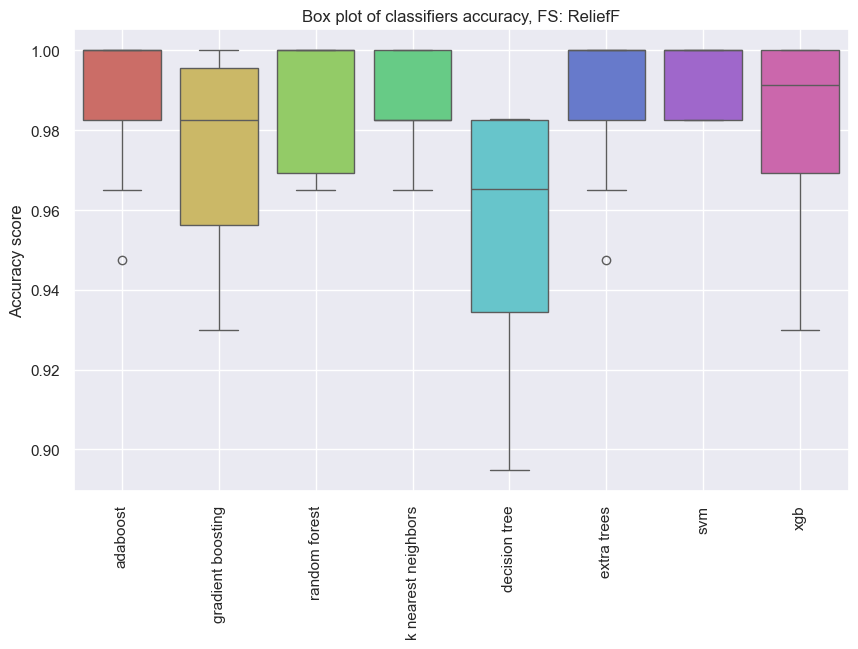

In [24]:
pm_relieff.plot_classifier_acc()

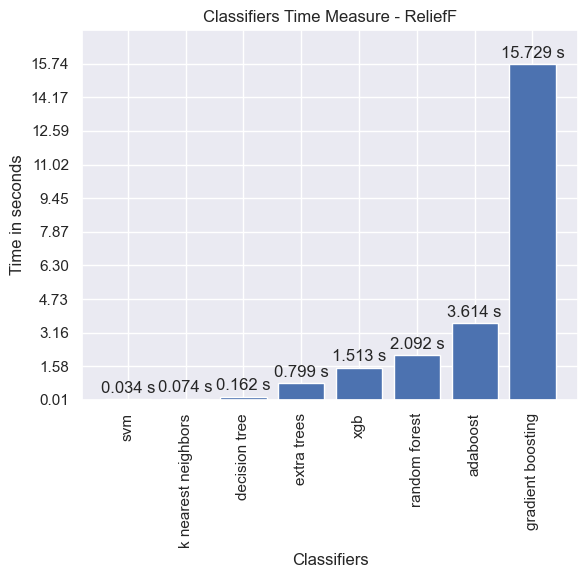

svm: 0.034 s.
k nearest neighbors: 0.074 s.
decision tree: 0.162 s.
extra trees: 0.799 s.
xgb: 1.513 s.
random forest: 2.092 s.
adaboost: 3.614 s.
gradient boosting: 15.729 s.


In [25]:
pm_relieff.plot_classifier_time()

Mrmr

In [26]:
clf_mrmr = classifier.Classifier(X, y, features=mrmr_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [27]:
pm_mrmr = performanceMetrics.PerformanceMetrics(clf_mrmr)
pm_mrmr.all_metrics()

Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Roc Auc:
 {'adaboost': [0.98, 0.007], 'gradient boosting': [0.901, 0.03], 'random forest': [0.969, 0.012], 'k nearest neighbors': [0.978, 0.01], 'decision tree': [0.913, 0.031], 'extra trees': [0.981, 0.005], 'svm': [0.972, 0.007], 'xgb': [0.963, 0.01]}
F1 score:
 {'adaboost': [0.996, 0.007], 'gradient boosting': [0.984, 0.03], 'random forest': [0.993, 0.012], 'k nearest neighbors': [0.994, 0.01], 'decision tree': [0.982, 0.031], 'extra trees': [0.997, 0.005], 'svm': [0.996, 0.007], 'xgb': [0.994, 0.01]}
MCC:
 {'adaboost': [0.962, 0.007], 'gradient boosting': [0.843, 0.03], 'random forest': [0.933, 0.012], 'k nearest neighbors': [0.944, 0.01], 'decision tree': [0.835, 0.031], 'extra trees': [0.971, 0.005], 'svm': [0.961, 0.007], 'xgb': [

["ACC: {'adaboost': 0.993, 'gradient boosting': 0.97, 'random forest': 0.988, 'k nearest neighbors': 0.99, 'decision tree': 0.969, 'extra trees': 0.995, 'svm': 0.993, 'xgb': 0.99}",
 "Roc Auc: {'adaboost': 0.98, 'gradient boosting': 0.901, 'random forest': 0.969, 'k nearest neighbors': 0.978, 'decision tree': 0.913, 'extra trees': 0.981, 'svm': 0.972, 'xgb': 0.963}",
 "F1 score: {'adaboost': 0.996, 'gradient boosting': 0.984, 'random forest': 0.993, 'k nearest neighbors': 0.994, 'decision tree': 0.982, 'extra trees': 0.997, 'svm': 0.996, 'xgb': 0.994}",
 "MCC: {'adaboost': 0.962, 'gradient boosting': 0.843, 'random forest': 0.933, 'k nearest neighbors': 0.944, 'decision tree': 0.835, 'extra trees': 0.971, 'svm': 0.961, 'xgb': 0.942}"]

Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}


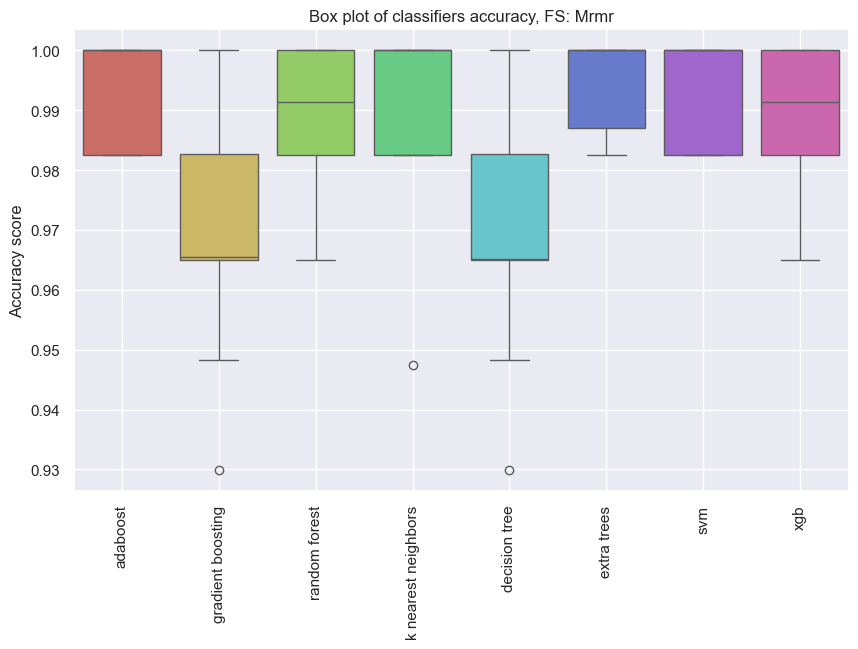

In [28]:
pm_mrmr.plot_classifier_acc()

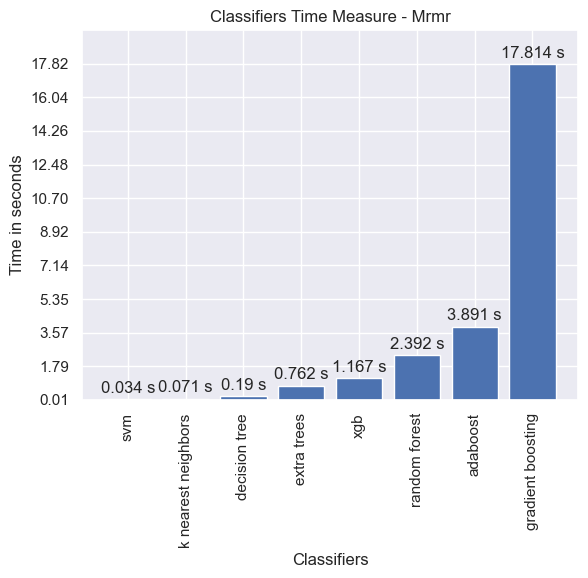

svm: 0.034 s.
k nearest neighbors: 0.071 s.
decision tree: 0.19 s.
extra trees: 0.762 s.
xgb: 1.167 s.
random forest: 2.392 s.
adaboost: 3.891 s.
gradient boosting: 17.814 s.


In [29]:
pm_mrmr.plot_classifier_time()

uTest

In [30]:
clf_uTest = classifier.Classifier(X, y, features=uTest_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [31]:
pm_uTest = performanceMetrics.PerformanceMetrics(clf_uTest)
pm_uTest.all_metrics()

Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.019], 'xgb': [0.991, 0.009]}
Roc Auc:
 {'adaboost': [0.972, 0.007], 'gradient boosting': [0.961, 0.014], 'random forest': [0.956, 0.01], 'k nearest neighbors': [0.974, 0.017], 'decision tree': [0.969, 0.012], 'extra trees': [0.946, 0.014], 'svm': [0.958, 0.019], 'xgb': [0.971, 0.009]}
F1 score:
 {'adaboost': [0.996, 0.007], 'gradient boosting': [0.992, 0.014], 'random forest': [0.994, 0.01], 'k nearest neighbors': [0.99, 0.017], 'decision tree': [0.993, 0.012], 'extra trees': [0.992, 0.014], 'svm': [0.989, 0.019], 'xgb': [0.995, 0.009]}
MCC:
 {'adaboost': [0.961, 0.007], 'gradient boosting': [0.927, 0.014], 'random forest': [0.941, 0.01], 'k nearest neighbors': [0.912, 0.017], 'decision tree': [0.935, 0.012], 'extra trees': [0.919, 0.014], 'svm': [0.898, 0.019],

["ACC: {'adaboost': 0.993, 'gradient boosting': 0.986, 'random forest': 0.99, 'k nearest neighbors': 0.983, 'decision tree': 0.988, 'extra trees': 0.986, 'svm': 0.981, 'xgb': 0.991}",
 "Roc Auc: {'adaboost': 0.972, 'gradient boosting': 0.961, 'random forest': 0.956, 'k nearest neighbors': 0.974, 'decision tree': 0.969, 'extra trees': 0.946, 'svm': 0.958, 'xgb': 0.971}",
 "F1 score: {'adaboost': 0.996, 'gradient boosting': 0.992, 'random forest': 0.994, 'k nearest neighbors': 0.99, 'decision tree': 0.993, 'extra trees': 0.992, 'svm': 0.989, 'xgb': 0.995}",
 "MCC: {'adaboost': 0.961, 'gradient boosting': 0.927, 'random forest': 0.941, 'k nearest neighbors': 0.912, 'decision tree': 0.935, 'extra trees': 0.919, 'svm': 0.898, 'xgb': 0.952}"]

Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.019], 'xgb': [0.991, 0.009]}


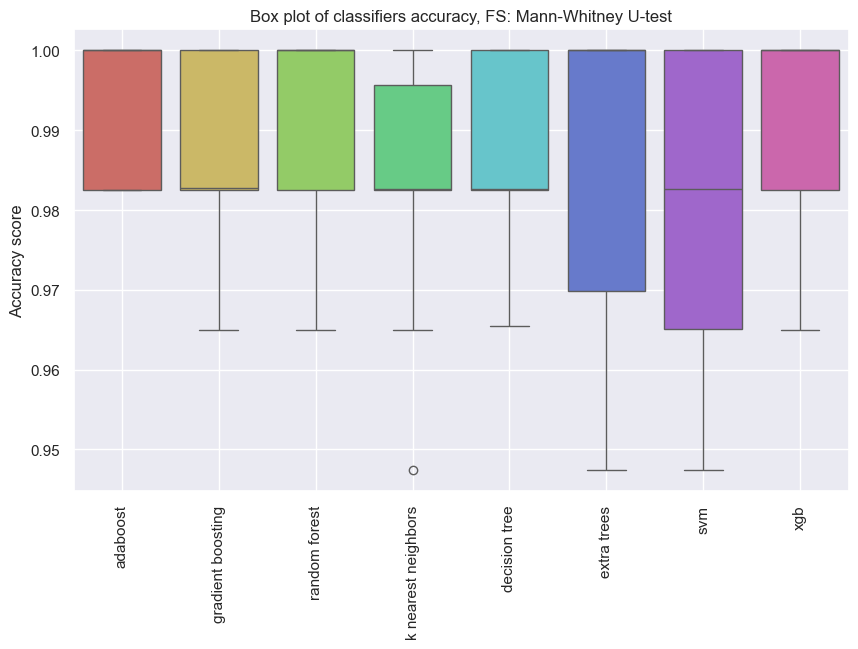

In [32]:
pm_uTest.plot_classifier_acc()

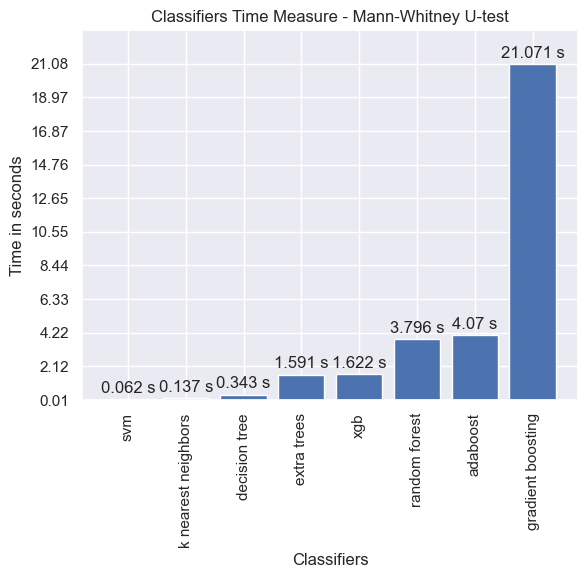

svm: 0.062 s.
k nearest neighbors: 0.137 s.
decision tree: 0.343 s.
extra trees: 1.591 s.
xgb: 1.622 s.
random forest: 3.796 s.
adaboost: 4.07 s.
gradient boosting: 21.071 s.


In [33]:
pm_uTest.plot_classifier_time()

Combined Classifier FS

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

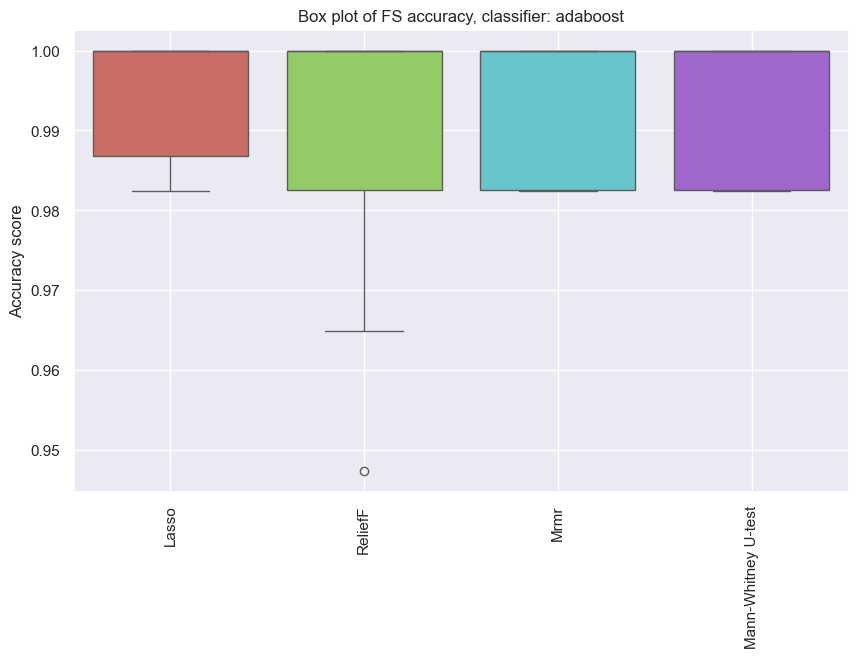

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

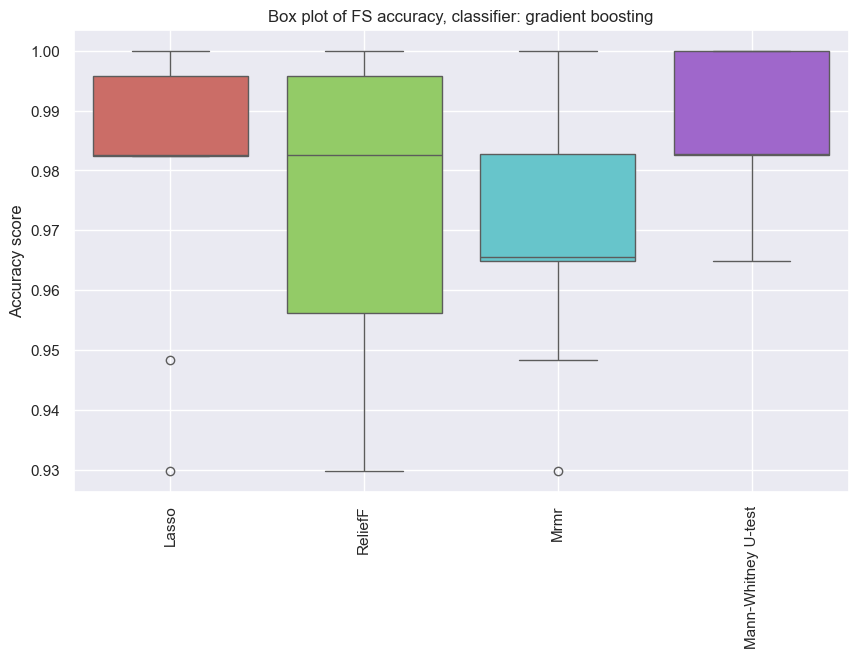

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

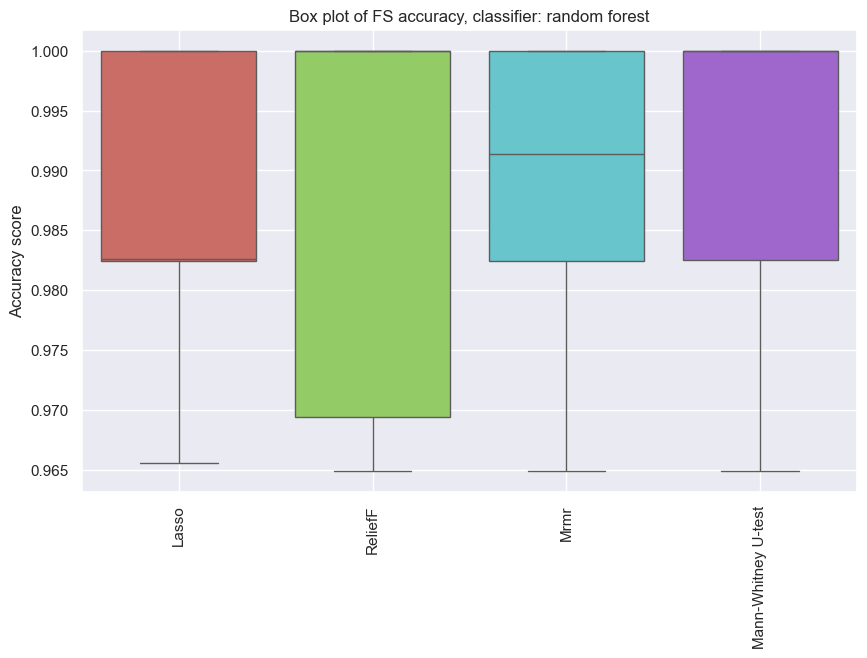

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

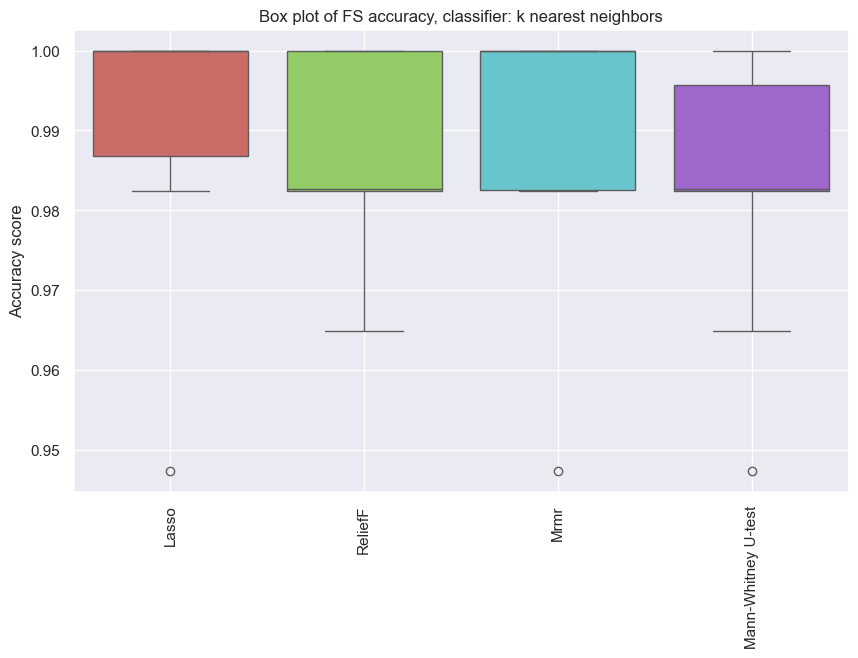

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

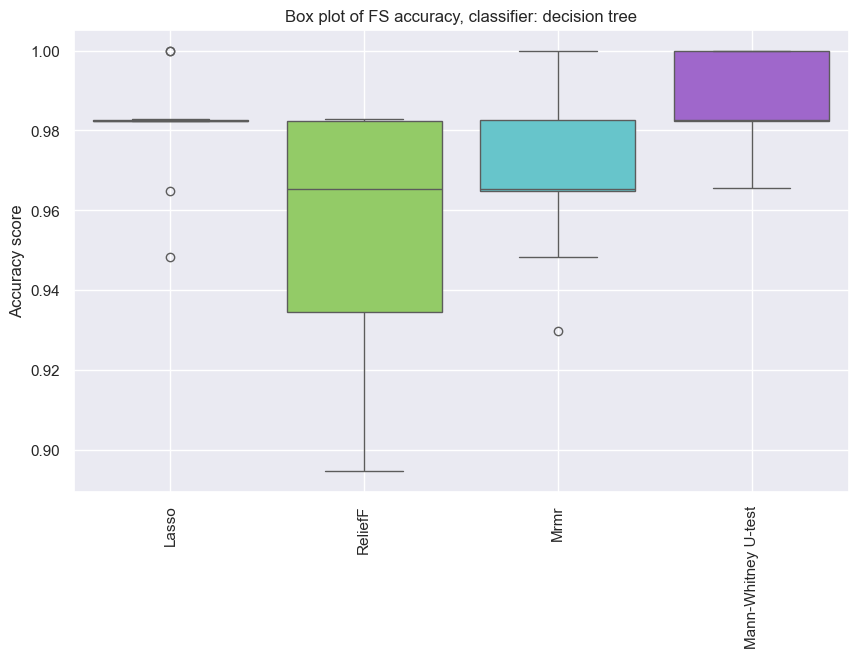

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

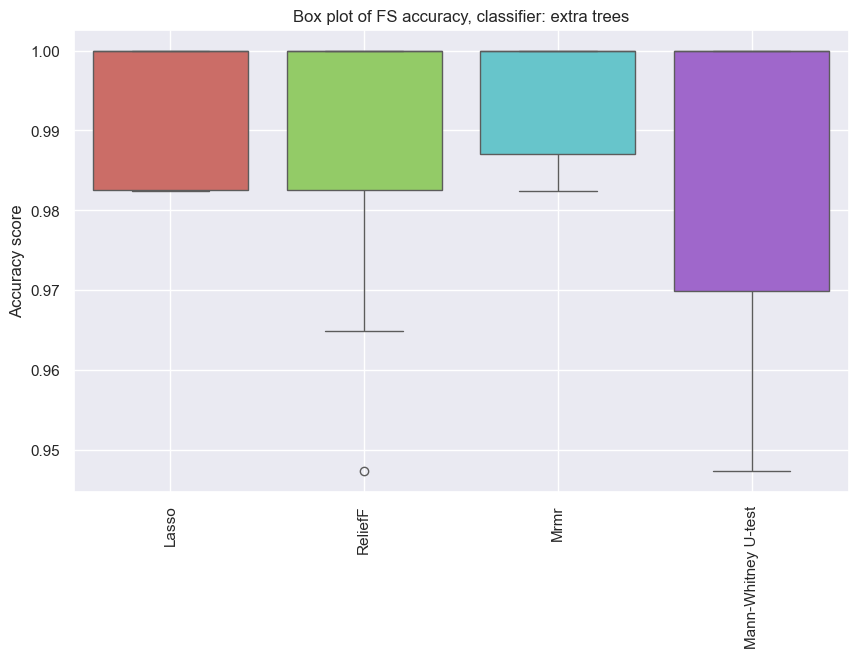

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

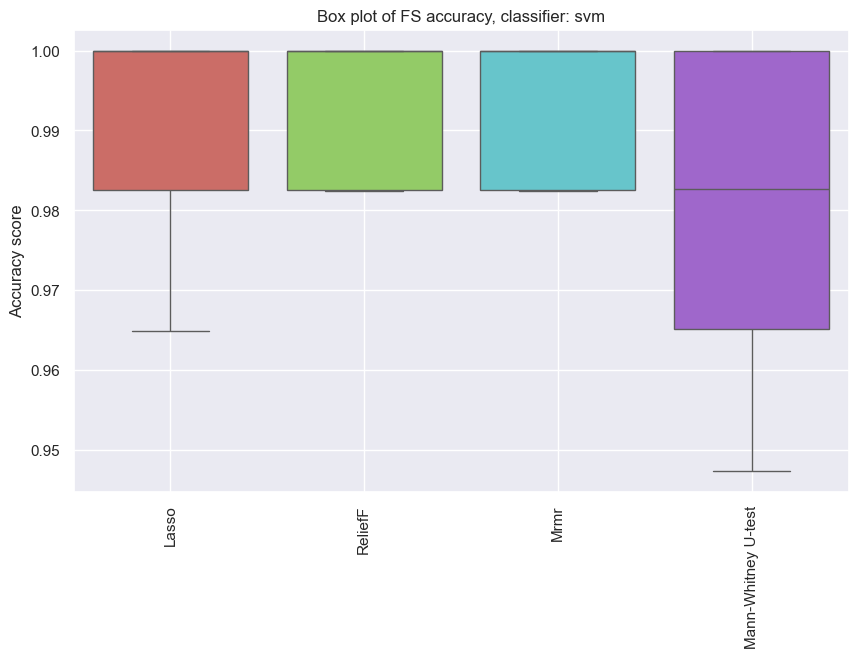

Accuracy:
 {'adaboost': [0.995, 0.005], 'gradient boosting': [0.979, 0.021], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.991, 0.009], 'decision tree': [0.981, 0.019], 'extra trees': [0.993, 0.007], 'svm': [0.991, 0.009], 'xgb': [0.988, 0.012]}
Accuracy:
 {'adaboost': [0.988, 0.012], 'gradient boosting': [0.975, 0.025], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.986, 0.014], 'decision tree': [0.956, 0.044], 'extra trees': [0.988, 0.012], 'svm': [0.993, 0.007], 'xgb': [0.983, 0.017]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.97, 0.03], 'random forest': [0.988, 0.012], 'k nearest neighbors': [0.99, 0.01], 'decision tree': [0.969, 0.031], 'extra trees': [0.995, 0.005], 'svm': [0.993, 0.007], 'xgb': [0.99, 0.01]}
Accuracy:
 {'adaboost': [0.993, 0.007], 'gradient boosting': [0.986, 0.014], 'random forest': [0.99, 0.01], 'k nearest neighbors': [0.983, 0.017], 'decision tree': [0.988, 0.012], 'extra trees': [0.986, 0.014], 'svm': [0.981, 0.0

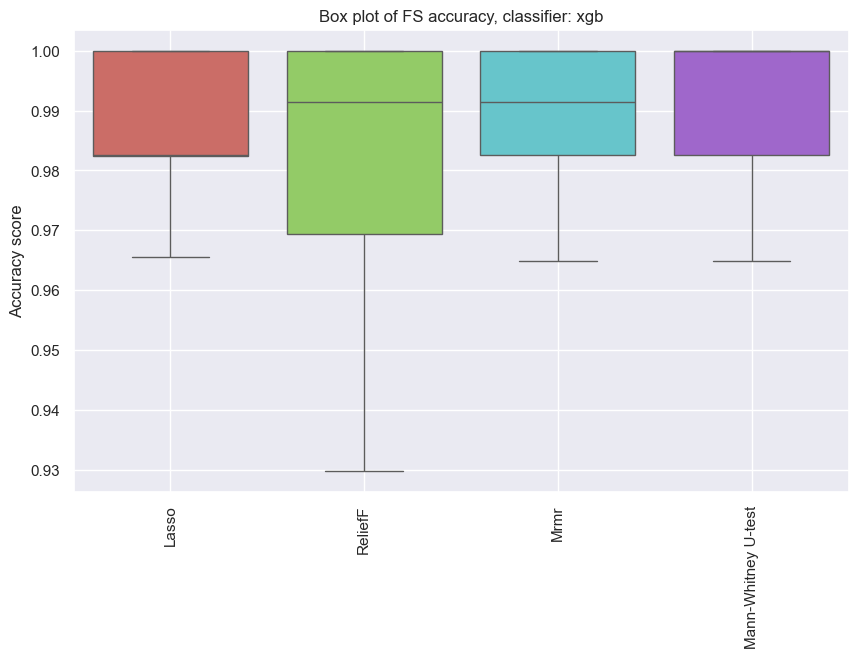

In [34]:
cls = ['adaboost', 'gradient boosting', 'random forest', 'k nearest neighbors', 'decision tree', 'extra trees', 'svm', 'xgb']

cm_cls = combinedMetrics.CombinedMetrics([pm_lasso, pm_relieff, pm_mrmr, pm_uTest], cls)

cm_cls.plot_classifiers_acc()

Ensemble

Lasso

In [35]:
ens_lasso = ensemble.Ensemble(X, y, features=lasso_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [36]:
pm_ens_lasso = performanceMetrics.PerformanceMetrics(ens_lasso)
pm_ens_lasso.all_metrics()

Accuracy:
 {'voting': [0.99, 0.01], 'bagging': [0.993, 0.007], 'stacking': [0.99, 0.01]}
Roc Auc:
 {'voting': [0.956, 0.01], 'bagging': [0.98, 0.007], 'stacking': [0.956, 0.01]}
F1 score:
 {'voting': [0.994, 0.01], 'bagging': [0.996, 0.007], 'stacking': [0.994, 0.01]}
MCC:
 {'voting': [0.941, 0.01], 'bagging': [0.962, 0.007], 'stacking': [0.941, 0.01]}


["ACC: {'voting': 0.99, 'bagging': 0.993, 'stacking': 0.99}",
 "Roc Auc: {'voting': 0.956, 'bagging': 0.98, 'stacking': 0.956}",
 "F1 score: {'voting': 0.994, 'bagging': 0.996, 'stacking': 0.994}",
 "MCC: {'voting': 0.941, 'bagging': 0.962, 'stacking': 0.941}"]

Accuracy:
 {'voting': [0.99, 0.01], 'bagging': [0.993, 0.007], 'stacking': [0.99, 0.01]}


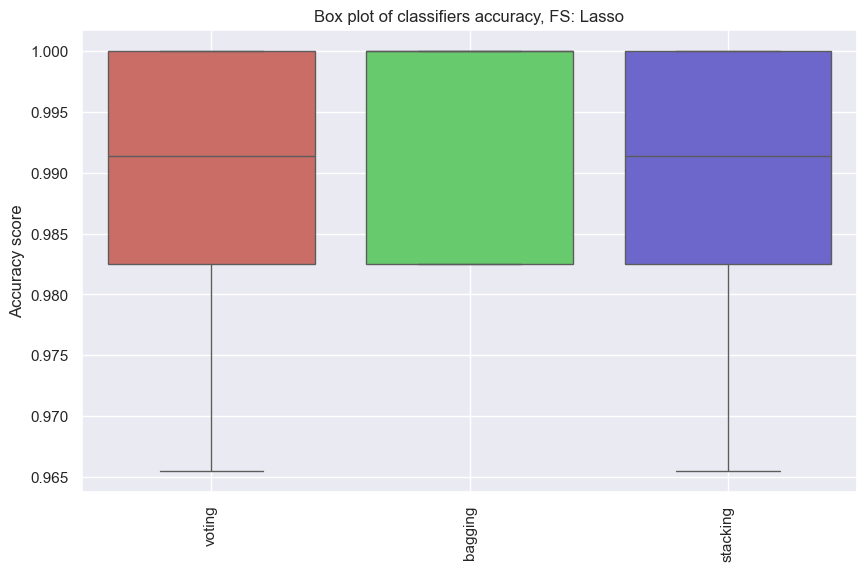

In [37]:
pm_ens_lasso.plot_classifier_acc()

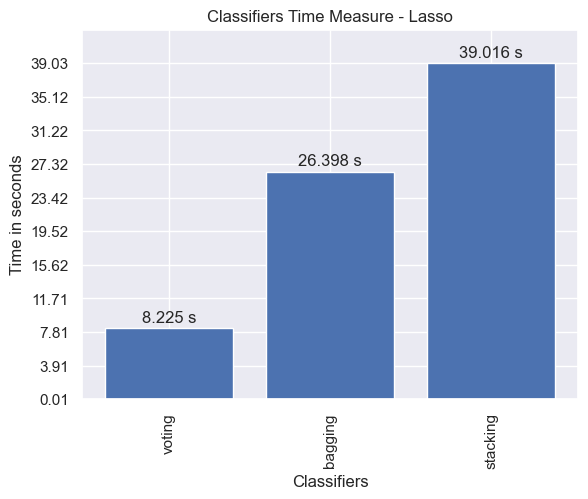

voting: 8.225 s.
bagging: 26.398 s.
stacking: 39.016 s.


In [38]:
pm_ens_lasso.plot_classifier_time()

Relieff

In [39]:
ens_relieff = ensemble.Ensemble(X, y, features=relieff_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [40]:
pm_ens_relieff = performanceMetrics.PerformanceMetrics(ens_relieff)
pm_ens_relieff.all_metrics()

Accuracy:
 {'voting': [0.988, 0.012], 'bagging': [0.991, 0.009], 'stacking': [0.986, 0.014]}
Roc Auc:
 {'voting': [0.977, 0.012], 'bagging': [0.979, 0.009], 'stacking': [0.968, 0.014]}
F1 score:
 {'voting': [0.993, 0.012], 'bagging': [0.995, 0.009], 'stacking': [0.992, 0.014]}
MCC:
 {'voting': [0.939, 0.012], 'bagging': [0.953, 0.009], 'stacking': [0.929, 0.014]}


["ACC: {'voting': 0.988, 'bagging': 0.991, 'stacking': 0.986}",
 "Roc Auc: {'voting': 0.977, 'bagging': 0.979, 'stacking': 0.968}",
 "F1 score: {'voting': 0.993, 'bagging': 0.995, 'stacking': 0.992}",
 "MCC: {'voting': 0.939, 'bagging': 0.953, 'stacking': 0.929}"]

Accuracy:
 {'voting': [0.988, 0.012], 'bagging': [0.991, 0.009], 'stacking': [0.986, 0.014]}


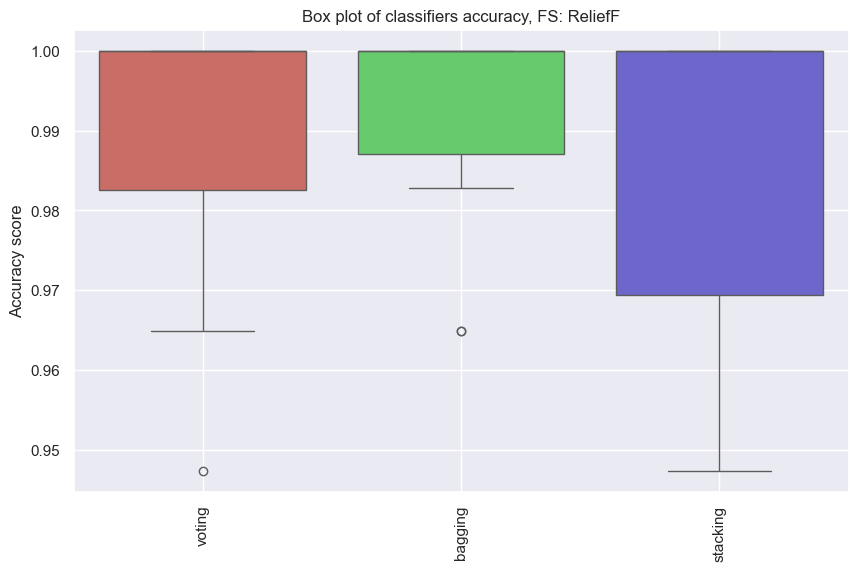

In [41]:
pm_ens_relieff.plot_classifier_acc()

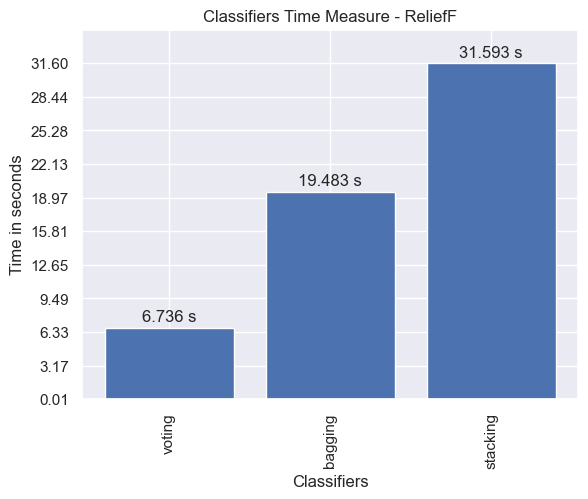

voting: 6.736 s.
bagging: 19.483 s.
stacking: 31.593 s.


In [42]:
pm_ens_relieff.plot_classifier_time()

Mrmr

In [43]:
ens_mrmr = ensemble.Ensemble(X, y, features=mrmr_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [44]:
pm_ens_mrmr = performanceMetrics.PerformanceMetrics(ens_mrmr)
pm_ens_mrmr.all_metrics()

Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.99, 0.01], 'stacking': [0.991, 0.009]}
Roc Auc:
 {'voting': [0.971, 0.009], 'bagging': [0.963, 0.01], 'stacking': [0.971, 0.009]}
F1 score:
 {'voting': [0.995, 0.009], 'bagging': [0.994, 0.01], 'stacking': [0.995, 0.009]}
MCC:
 {'voting': [0.953, 0.009], 'bagging': [0.942, 0.01], 'stacking': [0.953, 0.009]}


["ACC: {'voting': 0.991, 'bagging': 0.99, 'stacking': 0.991}",
 "Roc Auc: {'voting': 0.971, 'bagging': 0.963, 'stacking': 0.971}",
 "F1 score: {'voting': 0.995, 'bagging': 0.994, 'stacking': 0.995}",
 "MCC: {'voting': 0.953, 'bagging': 0.942, 'stacking': 0.953}"]

Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.99, 0.01], 'stacking': [0.991, 0.009]}


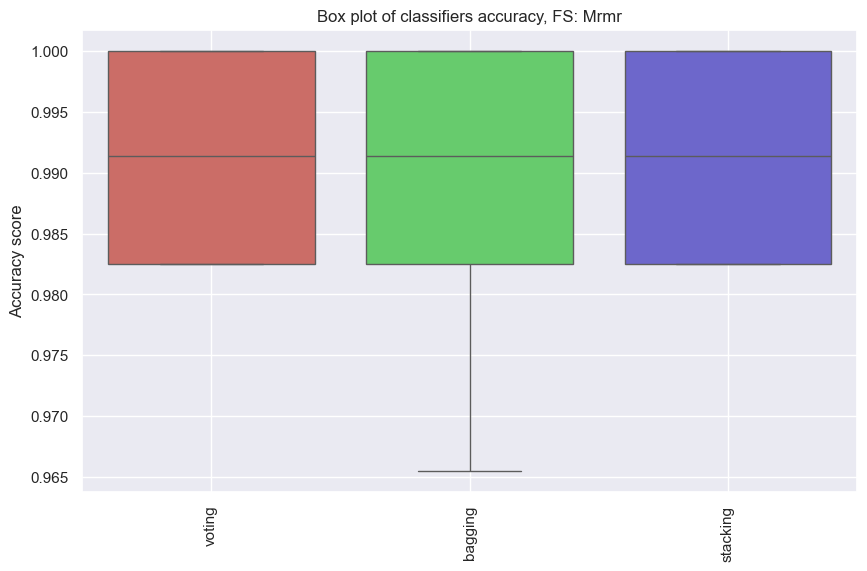

In [45]:
pm_ens_mrmr.plot_classifier_acc()

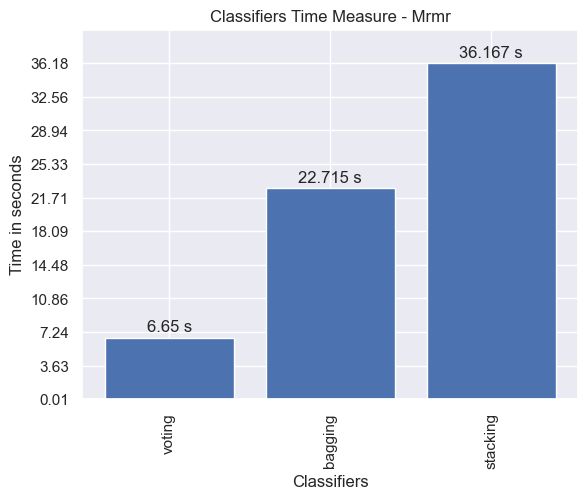

voting: 6.65 s.
bagging: 22.715 s.
stacking: 36.167 s.


In [46]:
pm_ens_mrmr.plot_classifier_time()

uTest

In [47]:
ens_uTest = ensemble.Ensemble(X, y, features=uTest_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [48]:
pm_ens_uTest = performanceMetrics.PerformanceMetrics(ens_uTest)
pm_ens_uTest.all_metrics()

Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.991, 0.009], 'stacking': [0.993, 0.007]}
Roc Auc:
 {'voting': [0.971, 0.009], 'bagging': [0.957, 0.009], 'stacking': [0.98, 0.007]}
F1 score:
 {'voting': [0.995, 0.009], 'bagging': [0.995, 0.009], 'stacking': [0.996, 0.007]}
MCC:
 {'voting': [0.952, 0.009], 'bagging': [0.95, 0.009], 'stacking': [0.962, 0.007]}


["ACC: {'voting': 0.991, 'bagging': 0.991, 'stacking': 0.993}",
 "Roc Auc: {'voting': 0.971, 'bagging': 0.957, 'stacking': 0.98}",
 "F1 score: {'voting': 0.995, 'bagging': 0.995, 'stacking': 0.996}",
 "MCC: {'voting': 0.952, 'bagging': 0.95, 'stacking': 0.962}"]

Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.991, 0.009], 'stacking': [0.993, 0.007]}


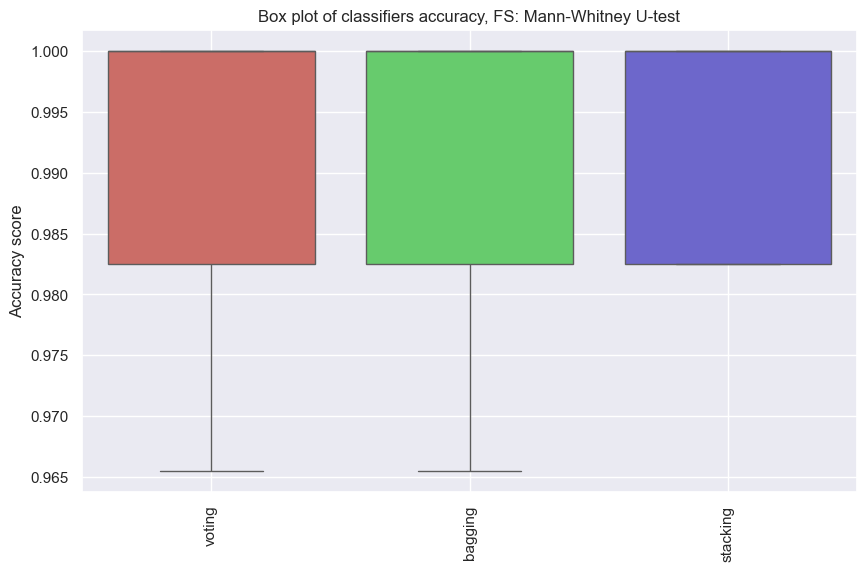

In [49]:
pm_ens_uTest.plot_classifier_acc()

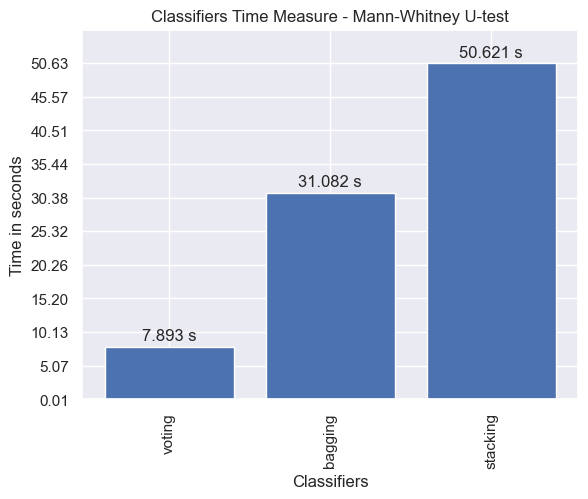

voting: 7.893 s.
bagging: 31.082 s.
stacking: 50.621 s.


In [50]:
pm_ens_uTest.plot_classifier_time()

Combined Ensemble FS

Accuracy:
 {'voting': [0.99, 0.01], 'bagging': [0.993, 0.007], 'stacking': [0.99, 0.01]}
Accuracy:
 {'voting': [0.988, 0.012], 'bagging': [0.991, 0.009], 'stacking': [0.986, 0.014]}
Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.99, 0.01], 'stacking': [0.991, 0.009]}
Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.991, 0.009], 'stacking': [0.993, 0.007]}


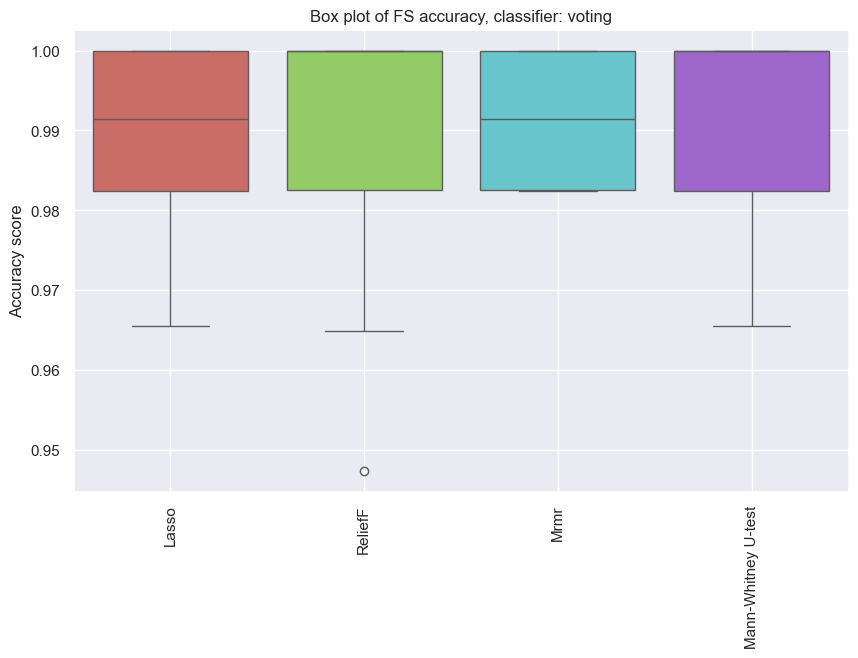

Accuracy:
 {'voting': [0.99, 0.01], 'bagging': [0.993, 0.007], 'stacking': [0.99, 0.01]}
Accuracy:
 {'voting': [0.988, 0.012], 'bagging': [0.991, 0.009], 'stacking': [0.986, 0.014]}
Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.99, 0.01], 'stacking': [0.991, 0.009]}
Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.991, 0.009], 'stacking': [0.993, 0.007]}


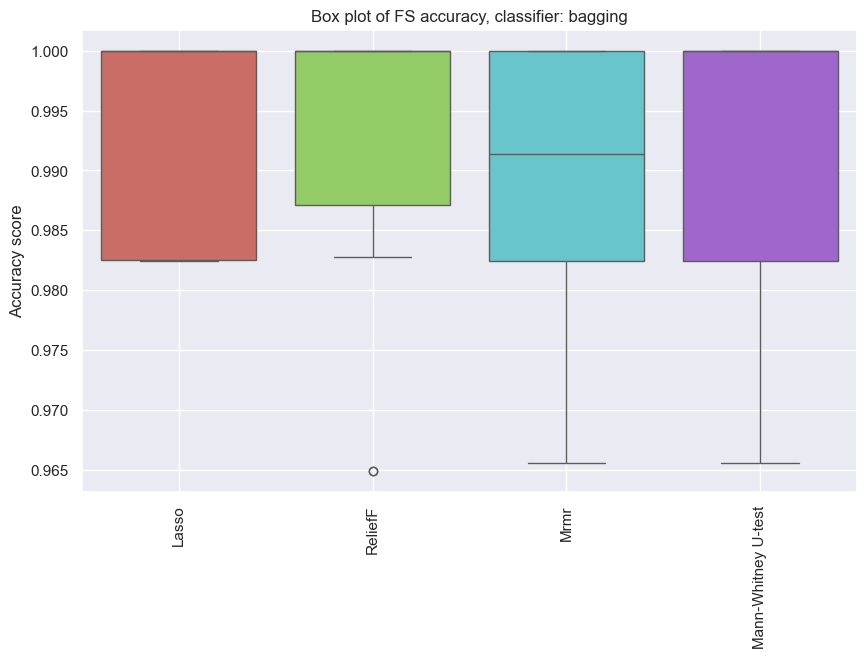

Accuracy:
 {'voting': [0.99, 0.01], 'bagging': [0.993, 0.007], 'stacking': [0.99, 0.01]}
Accuracy:
 {'voting': [0.988, 0.012], 'bagging': [0.991, 0.009], 'stacking': [0.986, 0.014]}
Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.99, 0.01], 'stacking': [0.991, 0.009]}
Accuracy:
 {'voting': [0.991, 0.009], 'bagging': [0.991, 0.009], 'stacking': [0.993, 0.007]}


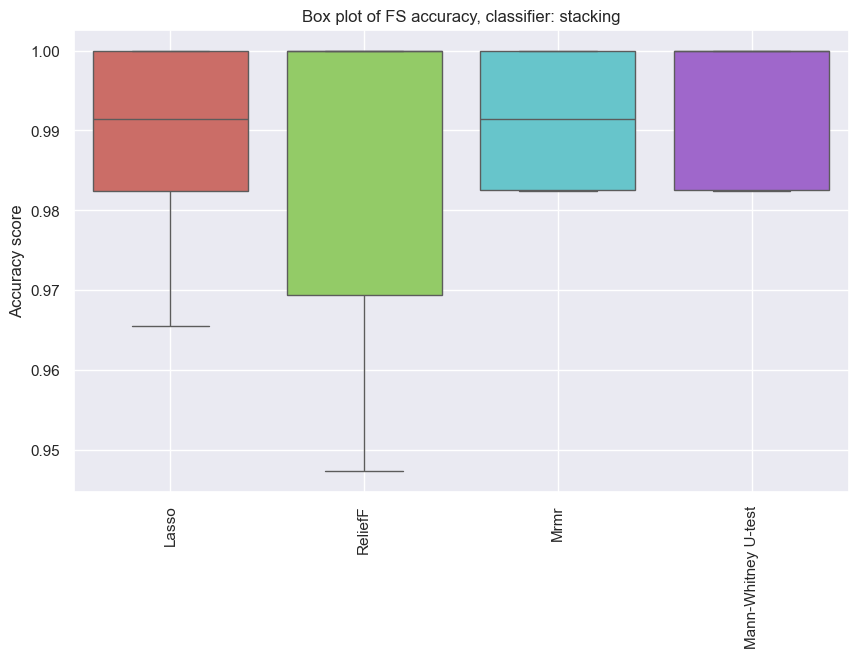

In [51]:
ens = ['voting', 'bagging', 'stacking']

cm = combinedMetrics.CombinedMetrics([pm_ens_lasso, pm_ens_relieff, pm_ens_mrmr, pm_ens_uTest], ens)

cm.plot_classifiers_acc()